In [75]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets

In [2]:
Data= pd.read_csv("Train.csv")
Data.head()
#Data.shape (105,3)

,PetalLengthCm,PetalWidthCm,Species
0,3.7,1.0,Iris-versicolor
1,5.1,1.5,Iris-virginica
2,5.5,1.8,Iris-virginica
3,4.4,1.4,Iris-versicolor
4,6.1,2.5,Iris-virginica


In [3]:
DataT= pd.read_csv("Test.csv")
DataT.head()
#(45,3)  DataT.shape

,PetalLengthCm,PetalWidthCm,Species
0,4.7,1.2,Iris-versicolor
1,1.7,0.3,Iris-setosa
2,6.9,2.3,Iris-virginica
3,4.5,1.5,Iris-versicolor
4,4.8,1.4,Iris-versicolor


In [4]:
X = Data.iloc[:, :-1].values

print("Attributes:")
print(X)


Attributes:
[[3.7 1. ]
 [5.1 1.5]
 [5.5 1.8]
 [4.4 1.4]
 [6.1 2.5]
 [4.2 1.3]
 [6.6 2.1]
 [4.5 1.5]
 [1.4 0.2]
 [6.7 2. ]
 [4.1 1. ]
 [1.4 0.2]
 [1.3 0.3]
 [1.9 0.4]
 [3.5 1. ]
 [4.9 1.8]
 [1.9 0.2]
 [1.6 0.2]
 [1.7 0.5]
 [4.2 1.3]
 [1.5 0.2]
 [4.2 1.2]
 [6.7 2.2]
 [1.4 0.2]
 [4.3 1.3]
 [5.  2. ]
 [1.4 0.2]
 [4.8 1.8]
 [5.1 1.9]
 [4.  1. ]
 [4.5 1.5]
 [5.4 2.3]
 [4.  1.3]
 [1.7 0.4]
 [3.3 1. ]
 [5.3 1.9]
 [1.4 0.2]
 [1.2 0.2]
 [3.8 1.1]
 [5.  1.7]
 [1.5 0.1]
 [5.1 2.4]
 [1.5 0.2]
 [1.6 0.6]
 [4.8 1.8]
 [3.  1.1]
 [5.7 2.3]
 [5.1 1.6]
 [5.6 1.4]
 [6.1 2.3]
 [4.  1.3]
 [1.4 0.2]
 [1.1 0.1]
 [5.  1.5]
 [6.  1.8]
 [1.5 0.2]
 [1.4 0.3]
 [1.3 0.2]
 [4.9 1.5]
 [5.6 2.4]
 [1.4 0.3]
 [5.5 2.1]
 [6.  2.5]
 [1.3 0.2]
 [4.7 1.4]
 [4.6 1.5]
 [4.8 1.8]
 [4.7 1.4]
 [5.3 2.3]
 [1.6 0.2]
 [5.4 2.1]
 [4.2 1.5]
 [5.2 2. ]
 [3.5 1. ]
 [3.9 1.4]
 [4.6 1.4]
 [1.3 0.3]
 [4.6 1.3]
 [4.4 1.2]
 [1.5 0.2]
 [4.1 1.3]
 [6.3 1.8]
 [5.7 2.1]
 [1.5 0.4]
 [3.3 1. ]
 [5.7 2.5]
 [5.8 1.6]
 [1.5 0.1]
 [5.6 2.4]
 [1.4 0.2

In [5]:
X.shape
#105,2

(105, 2)

In [6]:
Y = Data.iloc[:, 2].values
print("\nLabels:")
print(Y)


Labels:
['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'

In [ ]:
# concatenate 1s with data  X tilda 
x_tilda =np.concatenate((X,np.ones((105,1))),axis=1)
x_tilda

In [9]:
#do target array for every type of flower 
TA=np.full([len(Y),3],[0,0,0])
for Classes in range(len(Y)):
    if Y[Classes]=='Iris-setosa':
        TA[Classes][0]=1
    elif Y[Classes] == 'Iris-versicolor':
        TA[Classes][1]=1
    else:
        TA[Classes][2]=1
        
#TA.reshape(len(Y),3)
#TA.shape

(105, 3)

In [ ]:
target=np.array([TA]).reshape(len(Y),3)
target

In [16]:
#calculate W
W=np.linalg.inv(x_tilda.T @ x_tilda) @x_tilda.T @ target
W

array([[-0.25035195,  0.28539678, -0.03504482],
       [ 0.01970888, -0.59028535,  0.57057647],
       [ 1.24005633, -0.0216828 , -0.21837353]])

In [29]:
# see w by col for every class
WcOne=np.array([W[0][0],W[1][0],W[2][0]])
WcTwo=np.array([W[0][1],W[1][1],W[2][1]])
WcThree=np.array([W[0][2],W[1][2],W[2][2]])

WcOne

array([-0.25035195,  0.01970888,  1.24005633])

In [19]:
#separate species from the test.csv
X2 = DataT.iloc[:, :-1].values

print("Attributes:")
print(X2)


Attributes:
[[4.7 1.2]
 [1.7 0.3]
 [6.9 2.3]
 [4.5 1.5]
 [4.8 1.4]
 [1.5 0.4]
 [3.6 1.3]
 [5.1 2.3]
 [4.5 1.5]
 [3.9 1.2]
 [5.1 2. ]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.1]
 [1.5 0.3]
 [4.7 1.6]
 [5.8 2.2]
 [3.9 1.1]
 [4.5 1.3]
 [5.6 2.2]
 [1.6 0.2]
 [4.9 1.8]
 [1.6 0.4]
 [5.6 2.1]
 [6.4 2. ]
 [5.2 2.3]
 [5.8 1.8]
 [5.9 2.3]
 [1.4 0.3]
 [1.6 0.2]
 [1.  0.2]
 [1.5 0.4]
 [4.4 1.4]
 [1.6 0.2]
 [1.3 0.2]
 [5.  1.9]
 [4.5 1.5]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [5.1 1.9]
 [4.5 1.6]
 [4.7 1.5]
 [1.3 0.4]
 [1.5 0.2]]


In [32]:
Type=DataT['Species']
Type

0     Iris-versicolor
1         Iris-setosa
2      Iris-virginica
3     Iris-versicolor
4     Iris-versicolor
5         Iris-setosa
6     Iris-versicolor
7      Iris-virginica
8     Iris-versicolor
9     Iris-versicolor
10     Iris-virginica
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15    Iris-versicolor
16     Iris-virginica
17    Iris-versicolor
18    Iris-versicolor
19     Iris-virginica
20        Iris-setosa
21     Iris-virginica
22        Iris-setosa
23     Iris-virginica
24     Iris-virginica
25     Iris-virginica
26     Iris-virginica
27     Iris-virginica
28        Iris-setosa
29        Iris-setosa
30        Iris-setosa
31        Iris-setosa
32    Iris-versicolor
33        Iris-setosa
34        Iris-setosa
35     Iris-virginica
36    Iris-versicolor
37        Iris-setosa
38        Iris-setosa
39        Iris-setosa
40     Iris-virginica
41    Iris-versicolor
42    Iris-versicolor
43        Iris-setosa
44        Iris-setosa
Name: Spec

In [ ]:
#calculate x tilda for test dataset
x2_tilda =np.concatenate((X2,np.ones((45,1))),axis=1)
x2_tilda

In [21]:
x2_tilda.reshape(45,3)

array([[4.7, 1.2, 1. ],
       [1.7, 0.3, 1. ],
       [6.9, 2.3, 1. ],
       [4.5, 1.5, 1. ],
       [4.8, 1.4, 1. ],
       [1.5, 0.4, 1. ],
       [3.6, 1.3, 1. ],
       [5.1, 2.3, 1. ],
       [4.5, 1.5, 1. ],
       [3.9, 1.2, 1. ],
       [5.1, 2. , 1. ],
       [1.4, 0.1, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.1, 1. ],
       [1.5, 0.3, 1. ],
       [4.7, 1.6, 1. ],
       [5.8, 2.2, 1. ],
       [3.9, 1.1, 1. ],
       [4.5, 1.3, 1. ],
       [5.6, 2.2, 1. ],
       [1.6, 0.2, 1. ],
       [4.9, 1.8, 1. ],
       [1.6, 0.4, 1. ],
       [5.6, 2.1, 1. ],
       [6.4, 2. , 1. ],
       [5.2, 2.3, 1. ],
       [5.8, 1.8, 1. ],
       [5.9, 2.3, 1. ],
       [1.4, 0.3, 1. ],
       [1.6, 0.2, 1. ],
       [1. , 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [4.4, 1.4, 1. ],
       [1.6, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [5. , 1.9, 1. ],
       [4.5, 1.5, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.1, 1. ],
       [5.1, 1.9, 1. ],
       [4.5, 1.6

In [52]:
# for each class calculate the Y and add max Y to prediction array 
PredictionA=np.array([])
for Class in range (len(X2)):
    YCOne = WcOne.T.dot(x2_tilda[Class])    
    YCTwo= WcTwo.T.dot(x2_tilda[Class])  
    YCThree = WcThree.T.dot(x2_tilda[Class])  
    if (( YCOne>YCTwo) and (YCOne>YCThree)):
        PredictionA=np.append(PredictionA,['Iris-setosa'])
    elif (( YCTwo>YCOne) and (YCTwo>YCThree)):
        PredictionA=np.append(PredictionA,['Iris-versicolor'])
    else:
        PredictionA=np.append(PredictionA,[ 'Iris-virginica'])
        
   





In [53]:
PredictionA
PredictionA.reshape(45,1)

array([['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-

In [54]:
YCOne

0.8684701740974634

In [55]:
YCTwo

0.2883552958189326

In [56]:
YCThree

-0.15682546991639798

In [57]:
#on speices in file test the right one
RightSpeices =np.array([])
for Class in range (len(Type)):
    if Type[Class]=='Iris-setosa':
        RightSpeices=np.append(RightSpeices,['Iris-setosa'])
    elif Type[Class] =='Iris-versicolor':
        RightSpeices=np.append(RightSpeices,['Iris-versicolor'])
    else:
        RightSpeices=np.append(RightSpeices,[ 'Iris-virginica'])
        
RightSpeices.reshape(45,1)  

array([['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       [

In [58]:
#confusion matrix
cm = confusion_matrix(RightSpeices, PredictionA)
print("Confusion  Matrix:")
print(cm)

Confusion  Matrix:
[[19  0  0]
 [ 0  5  8]
 [ 0  0 13]]


In [65]:
# calculate accuarncy for every class we have 

AccuracyClassOne = accuracy_score(RightSpeices[:(int(45/3))],  PredictionA[:int(45/3)])
error_rateClassOne = 1 - AccuracyClassOne
print("Misclassification error for setosa class: {}".format(error_rateClassOne))

AccuracyClassTwo= accuracy_score(RightSpeices[int(45/3):int((45/3)*2)],PredictionA[int(45/3):int((45/3)*2)])
error_rateClassTwo = 1 - AccuracyClassTwo
print("Misclassification error for versicolor class : {}".format(error_rateClassTwo))

AccuracyClassThree= accuracy_score(RightSpeices[int((45/3)*2):],PredictionA[int((45/3)*2):])
error_rateClassThree = 1 - AccuracyClassThree
print("Misclassification error for vriginica class : {}".format(error_rateClassThree))

overallacc = accuracy_score(RightSpeices, PredictionA)
overall_error = 1 - overallacc
print("Overall misclassification error : {}".format(overall_error))

Misclassification error for setosa class: 0.19999999999999996
Misclassification error for versicolor class : 0.06666666666666665
Misclassification error for vriginica class : 0.2666666666666667
Overall misclassification error : 0.1777777777777778


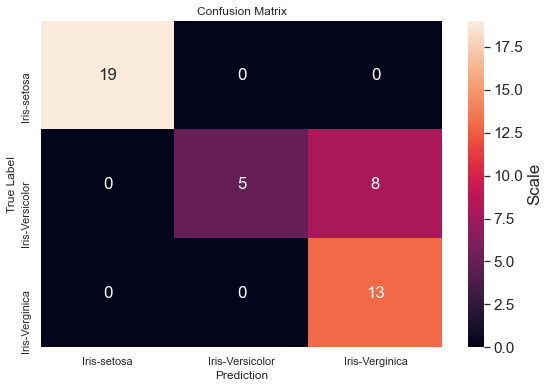

In [76]:
def plot_confusion_matrix(data, labels, output_filename):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="rocket", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Prediction")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

Types = ["Iris-setosa" , "Iris-Versicolor" , "Iris-Verginica"]
plot_confusion_matrix(cm, Types, "Confusion.jpg")